In [9]:
import zipfile

zip_data = "../data/01_raw/archive.zip"
extract_to = "../data/02_intermediate/"

In [10]:
with zipfile.ZipFile(zip_data, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

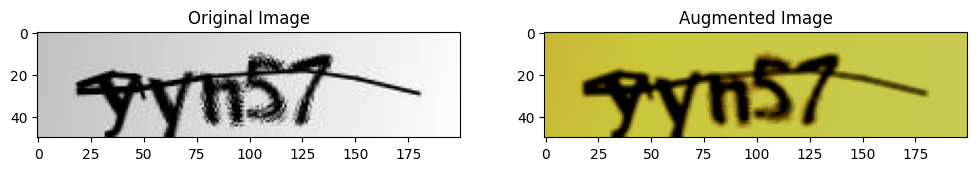

In [26]:
import cv2
import numpy as np
import albumentations as A
from matplotlib import pyplot as plt

# Define the augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=10),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10),
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 50.0)),
        A.MultiplicativeNoise(multiplier=(0.5, 1.5))
    ], p=0.5),
    A.Blur(blur_limit=3),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20)
])

# Load an example image (replace with your CAPTCHA image)
image = cv2.imread('../data/02_intermediate/archive/yyn57.png')

# Apply the augmentation
augmented_image = transform(image=image)['image']

# Display the original and augmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.show()


In [30]:
import os
import random
import shutil
import logging
from tqdm import tqdm

def split_data(source_folder, destination, split_ratio=0.8, random_seed=42):
    random.seed(random_seed)

    all_files = os.listdir(source_folder)
    random.shuffle(all_files)
    num_train = int(len(all_files) * split_ratio)
    train_files = all_files[:num_train]
    val_files = all_files[num_train:]

    train_folder = os.path.join(destination, "train")
    val_folder = os.path.join(destination, "val")

    if os.path.exists(train_folder):
        shutil.rmtree(train_folder)
    if os.path.exists(val_folder):
        shutil.rmtree(val_folder)
 
    os.makedirs(train_folder)
    os.makedirs(val_folder)

    for file in tqdm(train_files, desc="Copying train data"):
        shutil.copy(os.path.join(source_folder, file), os.path.join(train_folder, file))

    for file in tqdm(val_files, desc="Copying validation data"):
        shutil.copy(os.path.join(source_folder, file), os.path.join(val_folder, file))


In [31]:
import os

split_data(os.path.join(extract_to, "archive"), "../data/03_primary")

Copying validation data: 100%|██████████| 214/214 [00:03<00:00, 63.89it/s]
